<a href="https://colab.research.google.com/github/dariamichalowicz/Projekt_ko-cowy_SDA/blob/main/Predykcja_cen_uzywanych_aut_do_testow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
#manipulacja danymi
import pandas as pd
import numpy as np

#wizualizacja
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# EN-coding
!pip install category-encoders
import category_encoders as ce

#modelowanie
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#metryki do oceny
from sklearn.metrics import mean_absolute_percentage_error

#optymalizacja
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

#zapisanie modelu do pliku
import joblib
import os

### Data Understanding

In [97]:
# wczytanie datasetów
audi = pd.read_csv('/content/audi.csv')
bmw = pd.read_csv('/content/bmw.csv')
merc = pd.read_csv('/content/merc.csv')
vw = pd.read_csv('/content/vw.csv')

In [98]:
# dodanie kolumny z nazwą marki
audi['brand'] = 'audi'
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,audi
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,audi
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,audi
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,audi


In [99]:
# dodanie kolumny z nazwą marki
bmw['brand'] = 'bmw'
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmw
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmw
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmw
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmw
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmw
...,...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,bmw
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,bmw
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,bmw
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,bmw


In [100]:
# dodanie kolumny z nazwą marki
merc['brand'] = 'mercedes'
merc

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,mercedes
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,mercedes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,mercedes
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,mercedes
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,mercedes
...,...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,mercedes
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,mercedes
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,mercedes
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0,mercedes


In [101]:
# dodanie kolumny z nazwą marki
vw['brand'] = 'vw'
vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,vw
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,vw
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,vw
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,vw
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,vw
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [102]:
# połączenie datasetów
df = pd.concat([audi, bmw, merc, vw], axis=0, ignore_index=True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
49720,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
49721,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
49722,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
49723,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [103]:
# usunięcie niepotrzebnych kolumn
df = df.drop(['tax', 'mpg'], axis=1)
df

,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,1.0,audi
...,...,...,...,...,...,...,...,...
49720,Eos,2012,5990,Manual,74000,Diesel,2.0,vw
49721,Fox,2008,1799,Manual,88102,Petrol,1.2,vw
49722,Fox,2009,1590,Manual,70000,Petrol,1.4,vw
49723,Fox,2006,1250,Manual,82704,Petrol,1.2,vw


In [104]:
# przestawienie kolumny z nazwą marki na początek tabeli
ostatnia_kolumna = df.pop(df.columns[-1])
df.insert(0, ostatnia_kolumna.name, ostatnia_kolumna)
df

,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,1.0
...,...,...,...,...,...,...,...,...
49720,vw,Eos,2012,5990,Manual,74000,Diesel,2.0
49721,vw,Fox,2008,1799,Manual,88102,Petrol,1.2
49722,vw,Fox,2009,1590,Manual,70000,Petrol,1.4
49723,vw,Fox,2006,1250,Manual,82704,Petrol,1.2


In [105]:
# opis danych
df.describe()

,year,price,mileage,engineSize
count,49725.000000,49725.000000,49725.000000,49725.000000
mean,2017.194852,21490.188255,23379.721830,1.918665
std,2.191633,11094.741909,22642.502451,0.588176
min,1970.000000,650.000000,1.000000,0.000000
25%,2016.000000,13995.000000,5891.000000,1.500000
50%,2017.000000,19498.000000,16908.000000,2.000000
75%,2019.000000,26090.000000,33981.000000,2.000000
max,2020.000000,159999.000000,323000.000000,6.600000


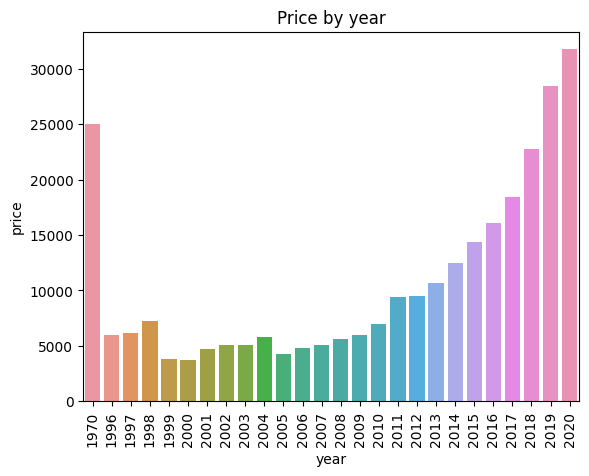

In [106]:
# wykres ceny (uśrednionej) od roku produkcji auta
grouped_year = df.groupby(['year'])[['price']].mean()
ax = sns.barplot(data=grouped_year, x=grouped_year.index, y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Price by year')
plt.show()


In [107]:
# usunięcie aut produkowanych przed 2000 rokiem
df = df[df['year'] >= 2000]
df

,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,1.0
...,...,...,...,...,...,...,...,...
49720,vw,Eos,2012,5990,Manual,74000,Diesel,2.0
49721,vw,Fox,2008,1799,Manual,88102,Petrol,1.2
49722,vw,Fox,2009,1590,Manual,70000,Petrol,1.4
49723,vw,Fox,2006,1250,Manual,82704,Petrol,1.2


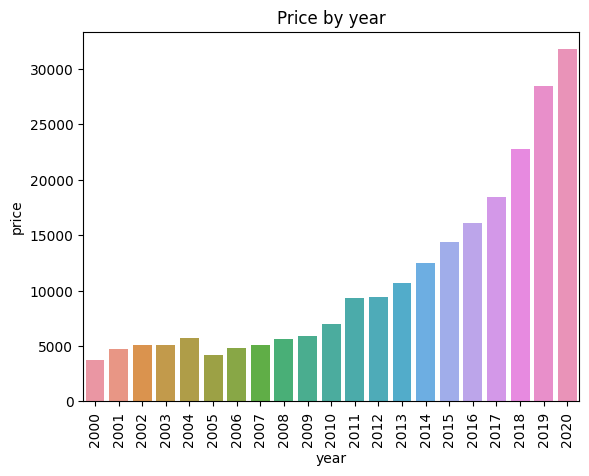

In [108]:
# wykres ceny (uśrednionej) od roku produkcji auta po odrzuceniu aut produkowanych przed 2000 rokiem
grouped_year = df.groupby(['year'])[['price']].mean()
ax = sns.barplot(data=grouped_year, x=grouped_year.index, y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Price by year')
plt.show()

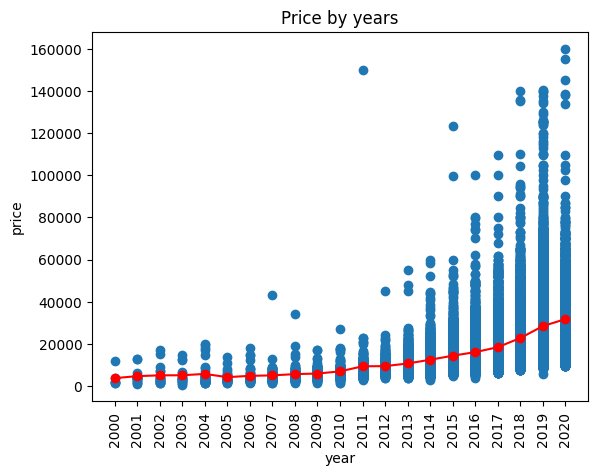

In [109]:
#scatter plot cena auta od roku produkcji
fig, ax = plt.subplots()

ax.scatter(df['year'], df['price'])
ax.set_xlabel('year')
ax.set_ylabel('price')
ax.set_title('Price by years')
plt.xticks(ticks=df['year'].unique(), labels=df['year'].unique(), rotation=90) #obrócenie o 90st. podpisów na osi X
# i dodanie podziałki rocznej

#dodanie wartości średniej dla każdego roku
grouped_year = df.groupby(['year'])[['price']].mean()
ax.plot(grouped_year.index, grouped_year.values, color='red', marker='o', linestyle='-', label='Mean Prices')
plt.show()

[Text(0.5, 1.0, 'Price by brand')]

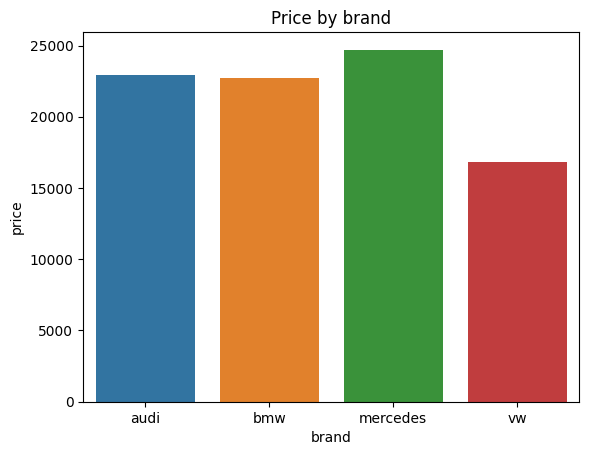

In [110]:
# wykres średniej ceny od marki
grouped_brand = df.groupby(['brand'])[['price']].mean()
sns.barplot(data=grouped_brand, x=grouped_brand.index, y='price').set(title='Price by brand')

[Text(0.5, 1.0, 'Price by fuel type')]

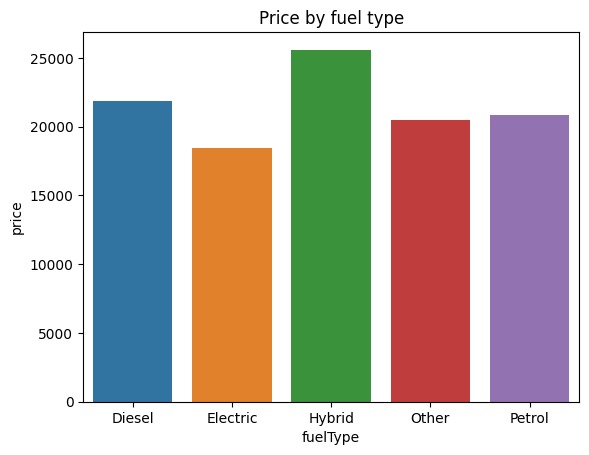

In [111]:
# wykres średniej ceny od rodzaju paliwa
grouped_fuel = df.groupby(['fuelType'])[['price']].mean()
sns.barplot(data=grouped_fuel, x=grouped_fuel.index, y='price').set(title='Price by fuel type')

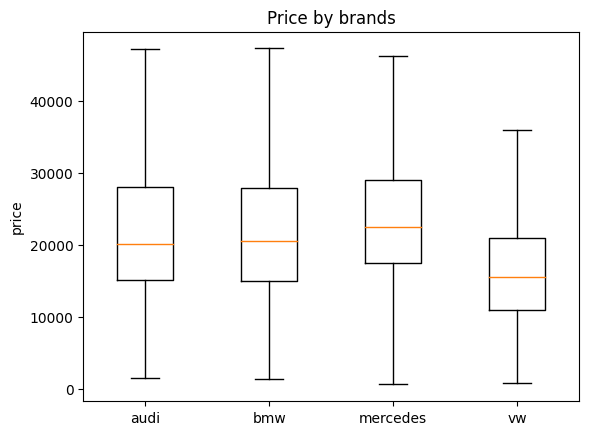

In [112]:
# box plot cena od marki
brands = df.groupby('brand')
audi = brands.get_group('audi')
bmw = brands.get_group('bmw')
merc = brands.get_group('mercedes')
vw = brands.get_group('vw')
fig, ax = plt.subplots()
ax.boxplot([audi['price'].dropna(), bmw['price'].dropna(), merc['price'].dropna(), vw['price'].dropna()], showfliers=False)
#showfliers=False -> usunięcie wartości odstających
ax.set_title('Price by brands')
ax.set_xticklabels(["audi", "bmw", "mercedes", 'vw'])
ax.set_ylabel("price")
plt.show()

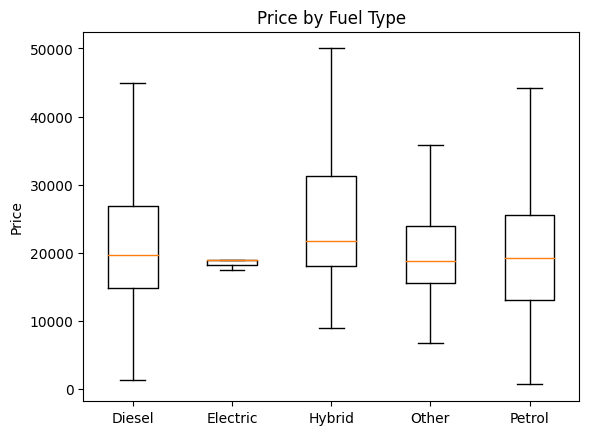

In [113]:
# Box Plot z wykorzystaniem pętli
# Grupowanie danych według paliwa
fuel_groups = df.groupby('fuelType')

# Inicjalizacja listy dla danych do boxplota
data_to_plot = []

# Iteracja przez grupy i dodanie danych do listy
for fuel_type, group_data in fuel_groups:
    data_to_plot.append(group_data['price'].dropna())

# Tworzenie boxplota
fig, ax = plt.subplots()
ax.boxplot(data_to_plot, showfliers=False)
ax.set_title('Price by Fuel Type')
ax.set_xticklabels(fuel_groups.groups.keys())
ax.set_ylabel('Price')

# Wyświetlenie wykresu
plt.show()

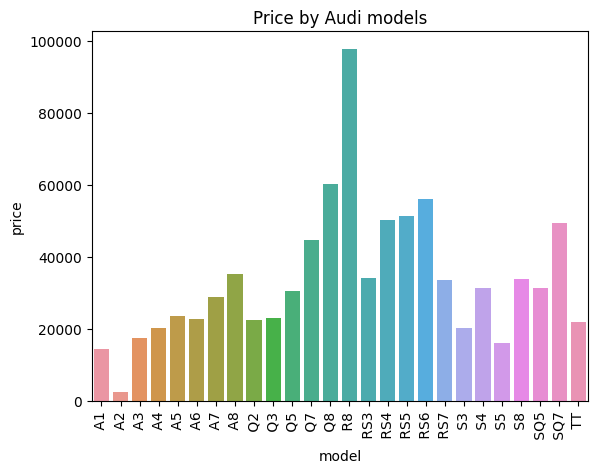

In [114]:
# wykres cena od modeli Audi
audi_cars = df[df['brand'] == 'audi']
audi_cars
grouped_audi_cars = audi_cars.groupby(['model'])[['price']].mean()
ax = sns.barplot(data=grouped_audi_cars, x=grouped_audi_cars.index, y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Price by Audi models')
plt.show()

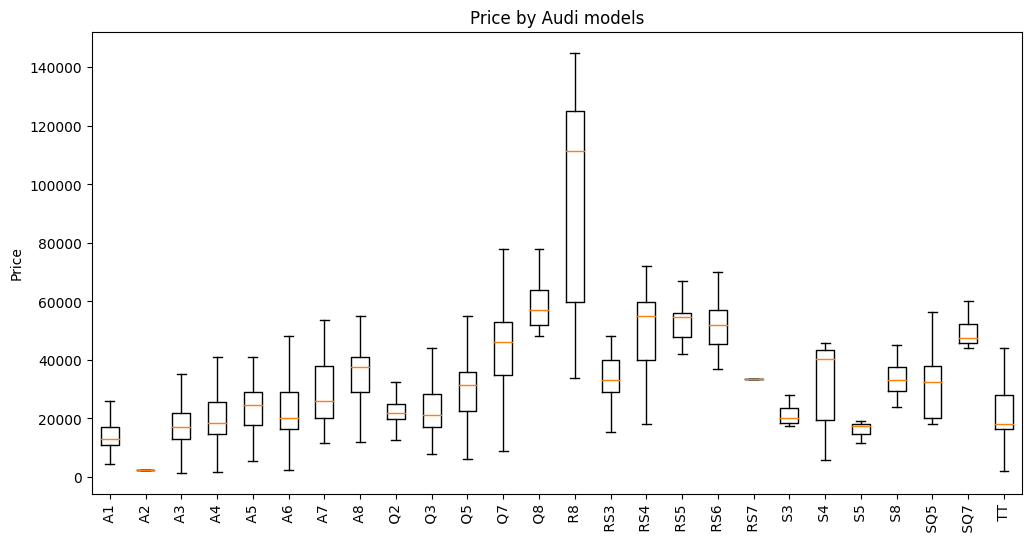

In [115]:
#Box Plot cena od modeli Audi

audi_cars = df[df['brand'] == 'audi']
audi_model_groups = audi_cars.groupby('model') # Grupowanie danych według model
lista_audi = []

# Iteracja przez grupy i dodanie danych do listy
for model_type, group_data in audi_model_groups:
    lista_audi.append(group_data['price'].dropna())
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(lista_audi, showfliers=False)
ax.set_title('Price by Audi models')
ax.set_xticklabels(audi_model_groups.groups.keys(), rotation=90)
ax.set_ylabel('Price')
plt.show()

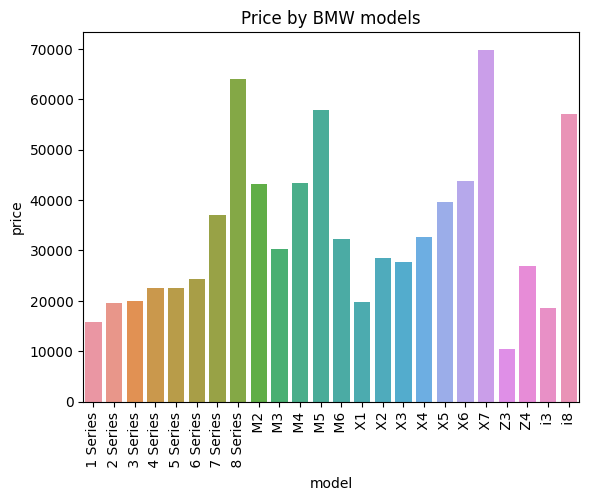

In [116]:
# wykres cena od modeli BMW
bmw_cars = df[df['brand'] == 'bmw']
bmw_cars
grouped_bmw_cars = bmw_cars.groupby(['model'])[['price']].mean()
ax = sns.barplot(data=grouped_bmw_cars, x=grouped_bmw_cars.index, y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Price by BMW models')
plt.show()

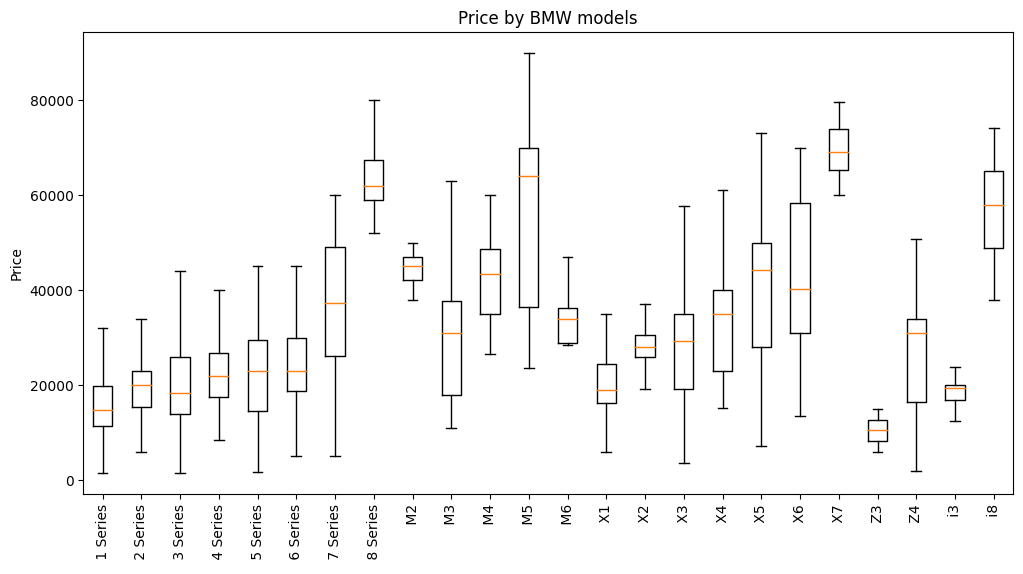

In [117]:
#Box Plot cena od modeli BMW
bmw_cars = df[df['brand'] == 'bmw']


bmw_model_groups = bmw_cars.groupby('model')
lista_bmw = []
for model_type, group_data in bmw_model_groups:
    lista_bmw.append(group_data['price'].dropna())

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(lista_bmw, showfliers=False)
ax.set_title('Price by BMW models')
ax.set_xticklabels(bmw_model_groups.groups.keys(), rotation=90)
ax.set_ylabel('Price')

plt.show()

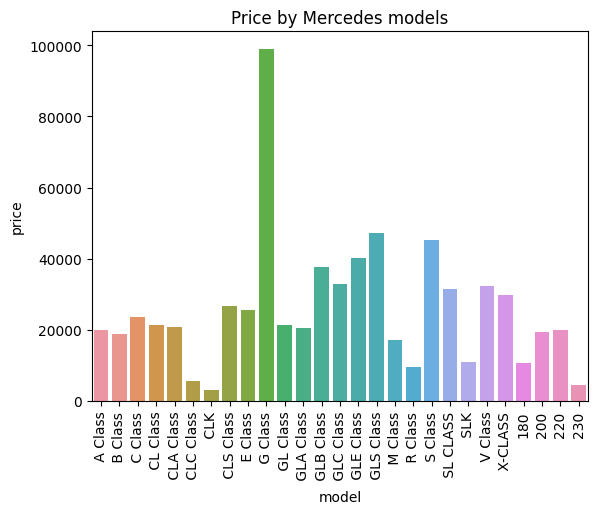

In [118]:
# wykres cena od modeli Mercedesa
merc_cars = df[df['brand'] == 'mercedes']
merc_cars
grouped_merc_cars = merc_cars.groupby(['model'])[['price']].mean()
ax = sns.barplot(data=grouped_merc_cars, x=grouped_merc_cars.index, y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Price by Mercedes models')
plt.show()

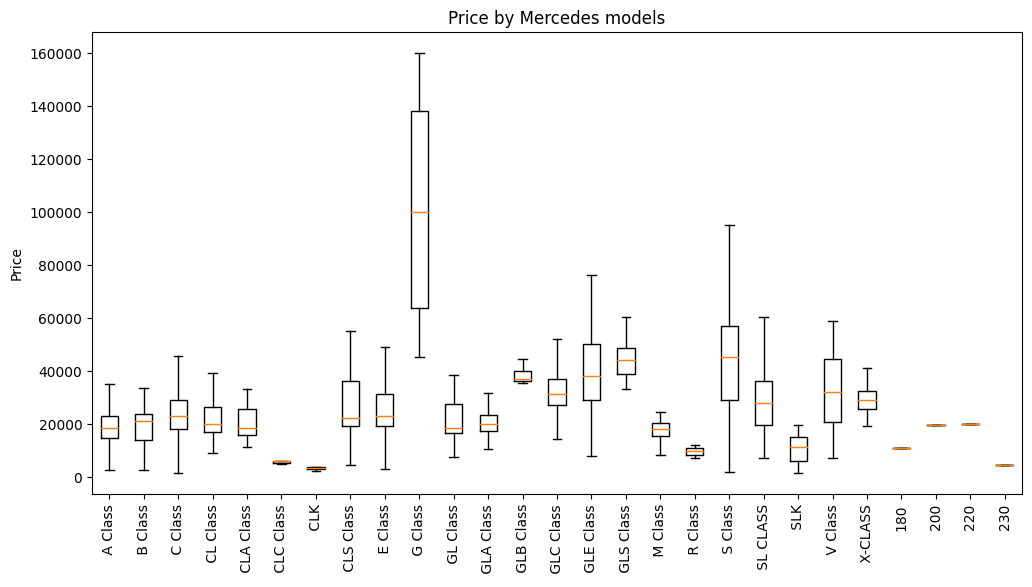

In [119]:
#Box Plot cena od modeli Marcedesa
merc_cars = df[df['brand'] == 'mercedes']
merc_model_groups = merc_cars.groupby('model')
lista_merc = []
for model_type, group_data in merc_model_groups:
    lista_merc.append(group_data['price'].dropna())


fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(lista_merc, showfliers=False)
ax.set_title('Price by Mercedes models')
ax.set_xticklabels(merc_model_groups.groups.keys(), rotation=90)
ax.set_ylabel('Price')


plt.show()

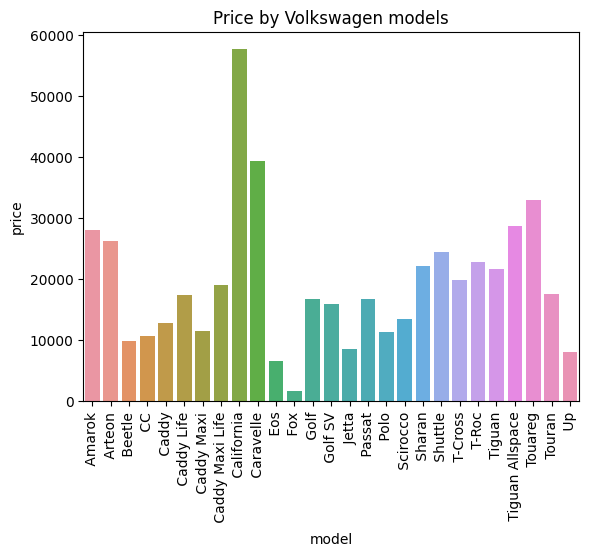

In [120]:
# wykres cena od modeli Volkswagena
vw_cars = df[df['brand'] == 'vw']
vw_cars
grouped_vw_cars = vw_cars.groupby(['model'])[['price']].mean()
ax = sns.barplot(data=grouped_vw_cars, x=grouped_vw_cars.index, y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Price by Volkswagen models')
plt.show()

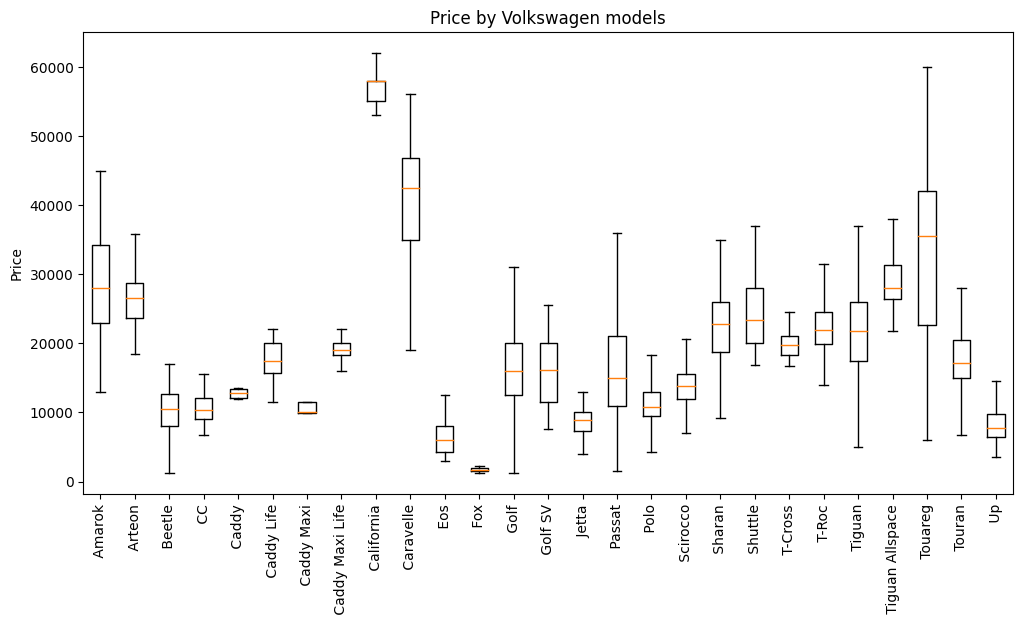

In [121]:
#Box Plot cena od modeli vw
vw_cars = df[df['brand'] == 'vw']
vw_model_groups = vw_cars.groupby('model')
lista_vw = []
for model_type, group_data in vw_model_groups:
    lista_vw.append(group_data['price'].dropna())


fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(lista_vw, showfliers=False)
ax.set_title('Price by Volkswagen models')
ax.set_xticklabels(vw_model_groups.groups.keys(), rotation=90)
ax.set_ylabel('Price')


plt.show()

In [209]:
#Enkodowanie zmiennych kategorycznych w celu zrobienia heat mapy korelacji
encoder = ce.OrdinalEncoder(cols=['brand', 'model', 'transmission', 'fuelType'], return_df=True)
encoder_df = encoder.fit_transform(df.drop('price', axis=1))
encoder_df
#OrdinalEncoder wprowadza porządek (którego nie chcemy)
# Przypisywanie porządkowych etykiet

,brand,model,year,transmission,mileage,fuelType,engineSize
0,1,1,2017,1,15735,1,1.4
1,1,2,2016,2,36203,2,2.0
2,1,1,2016,1,29946,1,1.4
3,1,3,2017,2,25952,2,2.0
4,1,4,2019,1,1998,1,1.0
...,...,...,...,...,...,...,...
49720,4,103,2012,1,74000,2,2.0
49721,4,104,2008,1,88102,1,1.2
49722,4,104,2009,1,70000,1,1.4
49723,4,104,2006,1,82704,1,1.2


<Axes: >

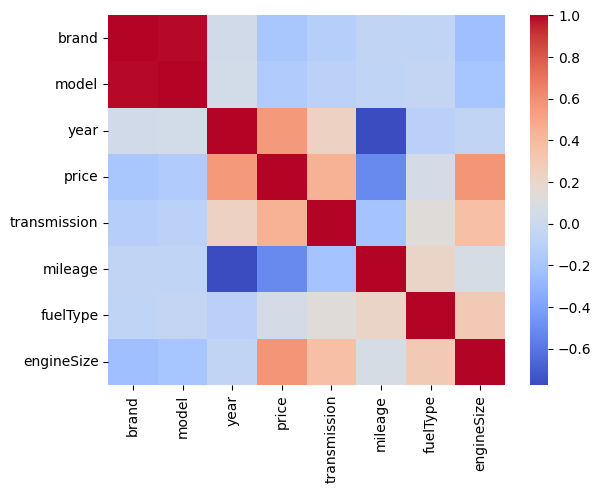

In [123]:
# Heat mapa korelacji
corr = encoder_df.corr()
sns.heatmap(corr, cmap="coolwarm")

In [207]:
# enkodowanie binarne do modelowania
# Redukcja wymiarowości w porównaniu do one-hot encoding
encoder = ce.BinaryEncoder(cols=['brand', 'model', 'transmission', 'fuelType'])
df_encoded = encoder.fit_transform(df.drop('price', axis=1))
df_encoded

# OneHotEncoding - Eliminuje problem sztucznego porządku w enkodowaniu kategorycznym,
# ale wprowadza wielowymiarowość (której też nie chcemy)

,brand_0,brand_1,brand_2,model_0,model_1,model_2,model_3,model_4,model_5,model_6,year,transmission_0,transmission_1,transmission_2,mileage,fuelType_0,fuelType_1,fuelType_2,engineSize
0,0,0,1,0,0,0,0,0,0,1,2017,0,0,1,15735,0,0,1,1.4
1,0,0,1,0,0,0,0,0,1,0,2016,0,1,0,36203,0,1,0,2.0
2,0,0,1,0,0,0,0,0,0,1,2016,0,0,1,29946,0,0,1,1.4
3,0,0,1,0,0,0,0,0,1,1,2017,0,1,0,25952,0,1,0,2.0
4,0,0,1,0,0,0,0,1,0,0,2019,0,0,1,1998,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49720,1,0,0,1,1,0,0,1,1,1,2012,0,0,1,74000,0,1,0,2.0
49721,1,0,0,1,1,0,1,0,0,0,2008,0,0,1,88102,0,0,1,1.2
49722,1,0,0,1,1,0,1,0,0,0,2009,0,0,1,70000,0,0,1,1.4
49723,1,0,0,1,1,0,1,0,0,0,2006,0,0,1,82704,0,0,1,1.2


### Modelowanie

In [208]:
# Ustalenie X i y
X = df_encoded
y = df['price']

In [126]:
# Podział na dane testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# średnia (dla zbioru treningowego)
mean = y_train.mean()
mean

21465.367364900547

In [128]:
#Regresja liniowa
model_reg_lin = LinearRegression()
model_reg_lin.fit(X_train, y_train)


LinearRegression()

In [129]:
# Metryka MAPE dla regresji liniowej
y_pred_reg_lin = model_reg_lin.predict(X_test)
MAPE_reg_lin = mean_absolute_percentage_error(y_test, y_pred_reg_lin)
MAPE_reg_lin

0.2109158455997345

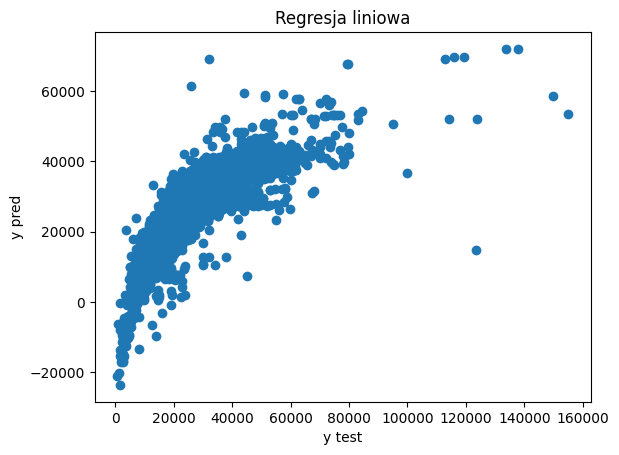

In [130]:
# Wizualizacja y_pred i y_test  dla regresji liniowej
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred_reg_lin)
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Regresja liniowa')
plt.show()

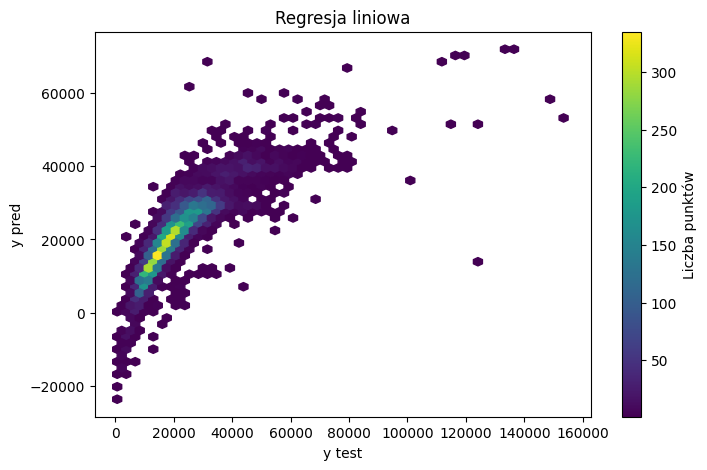

In [131]:
# Wizualizacja y_pred i y_test  dla regresji liniowej z uwzględnieniem gęstości punktów

fig, ax = plt.subplots(figsize=(8, 5))
hb = ax.hexbin(y_test, y_pred_reg_lin, gridsize=50, cmap='viridis', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Liczba punktów')
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Regresja liniowa')
plt.show()


In [132]:
# Regresja wielomianowa

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

LinearRegression()

In [133]:
# optymalizcja parametrów regresji wielomianowej
#degrees = [1, 2,3,4,5]
#cv_scores = []

#for degree in degrees:

    #model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    #scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    #scores = np.abs(scores)
    #average_score = np.mean(scores)

    #cv_scores.append(average_score)

In [134]:
# sprawdzenie najlepszych parametrów
#best_degree = degrees[np.argmin(cv_scores)]
#best_degree

In [135]:
# Metryka MAPE dla regresji wielomianowej
X_poly_test = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_poly_test)
MAPE_poly = mean_absolute_percentage_error(y_test, y_pred_poly)
MAPE_poly

0.1435412906396201

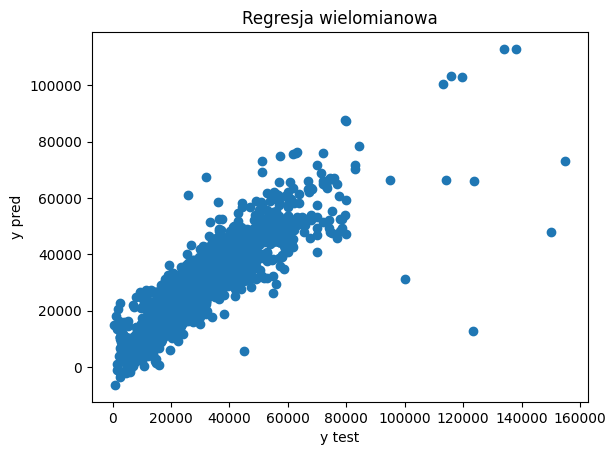

In [136]:
# Wizualizacja y_pred i y_test  dla regresji wielomianowej
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred_poly)
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Regresja wielomianowa')
plt.show()

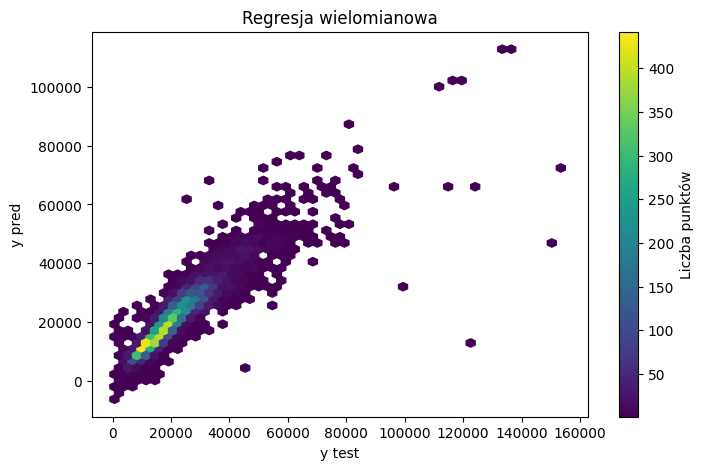

In [137]:
# Wizualizacja y_pred i y_test  dla regresji wielomianowej z uwzględnieniem gęstości punktów
fig, ax = plt.subplots(figsize=(8, 5))
hb = ax.hexbin(y_test, y_pred_poly, gridsize=50, cmap='viridis', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Liczba punktów')
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Regresja wielomianowa')
plt.show()

In [138]:
# Drzewko decyzyjne
model_tree = DecisionTreeRegressor(max_depth=15, min_samples_split=2, min_samples_leaf=9)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=9)

In [139]:
# optymalizcja parametrów drzewa decyzyjnego
param_grid_tree = {
    'max_depth': [3,5,7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2]
}

cv_tree = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search_tree = GridSearchCV(model_tree, param_grid_tree, cv=cv_tree, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=15, min_samples_leaf=9),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='neg_mean_squared_error')

In [140]:
# sprawdzenie najlepszych parametrów
best_params_tree = grid_search_tree.best_params_
best_params_tree

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [141]:
# Metryka MAPE dla drzewka decyzyjnego
y_pred_tree = model_tree.predict(X_test)
MAPE_tree = mean_absolute_percentage_error(y_test, y_pred_tree)
MAPE_tree

0.09915839264699453

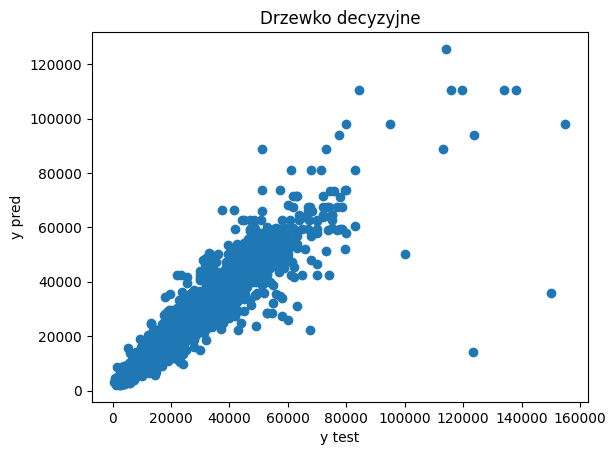

In [142]:
# Wizualizacja y_pred i y_test  dla drzewka decyzyjnego
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred_tree)
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Drzewko decyzyjne')
plt.show()

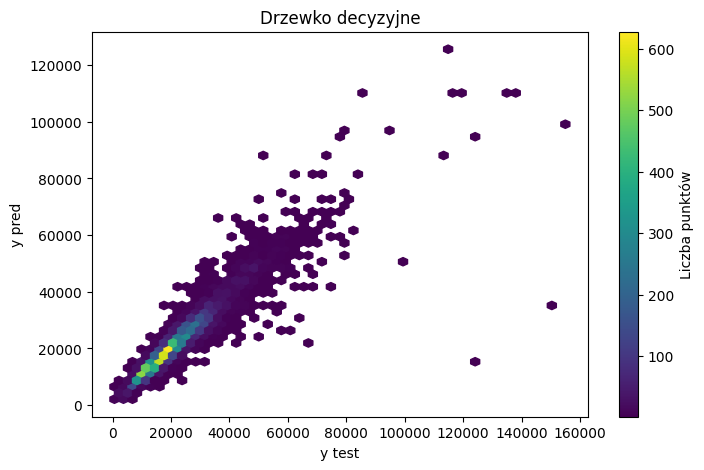

In [143]:
# Wizualizacja y_pred i y_test  dla drzewka decyzyjnego z uwzględnieniem gęstości punktów
fig, ax = plt.subplots(figsize=(8, 5))
hb = ax.hexbin(y_test, y_pred_tree, gridsize=50, cmap='viridis', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Liczba punktów')
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Drzewko decyzyjne')
plt.show()

In [151]:
# Random Forest Regression
model_random_forest = RandomForestRegressor(n_estimators=20, random_state=42,
                      min_samples_split=2, min_samples_leaf=4, max_depth=4)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=4, n_estimators=20,
                      random_state=42)

In [145]:
# optymalizcja parametrów Random Forest
param_grid_forest = {
    'n_estimators' : [10,20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2,4],
    'max_depth' : [2,4]
}

cv_forest = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search_forest = GridSearchCV(model_random_forest, param_grid_forest, cv=cv_forest, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(max_depth=2, min_samples_leaf=2,
                                             min_samples_split=5,
                                             random_state=42),
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]},
             scoring='neg_mean_squared_error')

In [146]:
# sprawdzenie najlepszych parametrów
best_params_forest = grid_search_forest.best_params_
best_params_forest

{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 20}

In [152]:
# Metryka MAPE dla Random Forest Regression
y_pred_random_forest= model_random_forest.predict(X_test)
MAPE_forest = mean_absolute_percentage_error(y_test, y_pred_random_forest)
MAPE_forest

0.20206520529566868

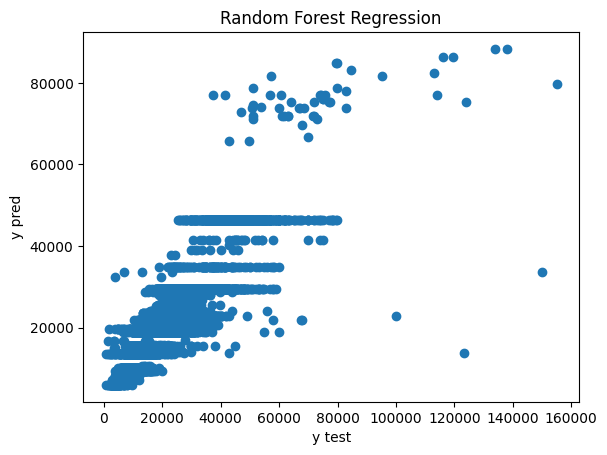

In [153]:
# Wizualizacja y_pred i y_test  dla Random Forest Regression
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_random_forest)
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Random Forest Regression')
plt.show()

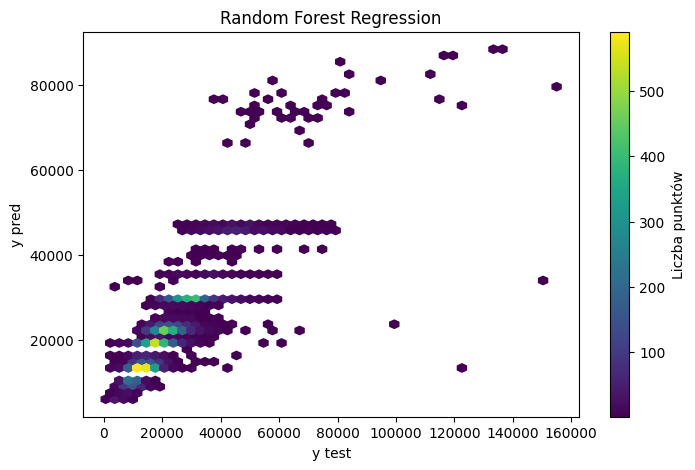

In [154]:
# Wizualizacja y_pred i y_test  dla random forest z uwzględnieniem gęstości punktów
fig, ax = plt.subplots(figsize=(8, 5))
hb = ax.hexbin(y_test, y_pred_random_forest, gridsize=50, cmap='viridis', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Liczba punktów')
ax.set_xlabel('y test')
ax.set_ylabel('y pred')
ax.set(title='Random Forest Regression')
plt.show()

In [150]:
# tabela porównawcza dla modeli
scores = pd.DataFrame(columns=["Name","MAPE"])
scores = scores.append(pd.Series({"Name": "Regresja liniowa", "MAPE": MAPE_reg_lin}), ignore_index=True)
scores = scores.append(pd.Series({"Name": "Regresja wielomianowa", "MAPE": MAPE_poly}), ignore_index=True)
scores = scores.append(pd.Series({"Name": "Drzewko decyzyjne", "MAPE": MAPE_tree}), ignore_index=True)
scores = scores.append(pd.Series({"Name": "Random Forest Regression", "MAPE": MAPE_forest}), ignore_index=True)
scores

<ipython-input-150-a3ab47c2b174>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(pd.Series({"Name": "Regresja liniowa", "MAPE": MAPE_reg_lin}), ignore_index=True)
<ipython-input-150-a3ab47c2b174>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(pd.Series({"Name": "Regresja wielomianowa", "MAPE": MAPE_poly}), ignore_index=True)
<ipython-input-150-a3ab47c2b174>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(pd.Series({"Name": "Drzewko decyzyjne", "MAPE": MAPE_tree}), ignore_index=True)
<ipython-input-150-a3ab47c2b174>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s

,Name,MAPE
0,Regresja liniowa,0.210916
1,Regresja wielomianowa,0.143541
2,Drzewko decyzyjne,0.099158
3,Random Forest Regression,0.286511


# Zapisanie modelu model_tree do wykorzystania w drugim notatniku

In [198]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [199]:
!ls '/content/gdrive/My Drive/'

'Arkusz kalkulacyjny bez tytułu.gsheet'   Kosmetyki.gsheet	   umowaM1.zip
 Badania.gsheet				  Na_slub.gdoc		   Wakacje
'Colab Notebooks'			  Prąd.gsheet		  'wycena D. Michałowicz.pdf'
'Complain letters 30.05.2022'		 'Python zadania.gdoc'	   Wydatki.gsheet
 Daria.gdoc				 'Siecie neuronowe.gdoc'  'z telefonu'
'Dokument bez tytułu.gdoc'		  Statystyka.gdoc


In [204]:
joblib.dump(model_tree, '/content/gdrive/My Drive/model.joblib')

['/content/gdrive/My Drive/model.joblib']